In [1]:
#%matplotlib widget

In [2]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from pprint import pprint

In [3]:
sleep_health_df = pd.read_csv('../Resources/cleaned_dataset.csv')
sleep_health_df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Diagnosis,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Diagnosis,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Diagnosis,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90


In [4]:
def blood_pressure_level(row):
    systolic = row['Systolic']
    diastolic = row['Diastolic']
    if systolic > 180 or diastolic > 120:
        return "Hypertensive Crisis"
    elif (systolic >= 140 or diastolic >= 90):
        return "Hypertension Stage 2"
    elif (systolic >= 130 or diastolic >= 80):
        return "Hypertension Stage 1"
    elif (systolic < 130 and systolic >= 120) and (diastolic < 80):
        return "Elevated"
    else:
        return "Normal"
    

In [5]:
sleep_health_df['Blood Pressure Category'] = sleep_health_df.apply(blood_pressure_level, axis=1)

In [6]:
male_df = sleep_health_df.loc[(sleep_health_df['Gender']=='Male')]
female_df = sleep_health_df.loc[(sleep_health_df['Gender']=='Female')]

In [15]:
numeric_columns = ['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps','Systolic', 'Diastolic']

In [16]:
male_bp_groups_df = male_df.groupby(['Blood Pressure Category'])[numeric_columns].mean().round(2)
female_bp_groups_df = female_df.groupby(['Blood Pressure Category'])[numeric_columns].mean().round(2)

bp_groups_df = pd.merge(male_bp_groups_df, female_bp_groups_df,on='Blood Pressure Category',suffixes=[" Male", " Female"],how='left')
bp_groups_df

,Sleep Duration Male,Quality of Sleep Male,Physical Activity Level Male,Stress Level Male,Heart Rate Male,Daily Steps Male,Systolic Male,Diastolic Male,Sleep Duration Female,Quality of Sleep Female,Physical Activity Level Female,Stress Level Female,Heart Rate Female,Daily Steps Female,Systolic Female,Diastolic Female
Blood Pressure Category,,,,,,,,,,,,,,,,
Elevated,7.30,8.00,70.00,6.00,72.00,6200.0,121.00,79.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hypertension Stage 1,7.04,6.99,59.51,6.08,70.48,6950.0,126.48,82.77,7.67,7.85,36.22,4.44,69.46,5112.96,126.69,82.00
Hypertension Stage 2,6.85,6.25,53.75,5.88,84.38,3362.5,140.25,90.75,6.95,7.37,71.09,5.10,69.64,7706.52,138.53,93.53
Normal,7.05,7.00,48.50,6.50,68.50,6900.0,117.50,76.00,7.28,8.10,62.69,4.00,68.08,7189.74,115.41,75.28


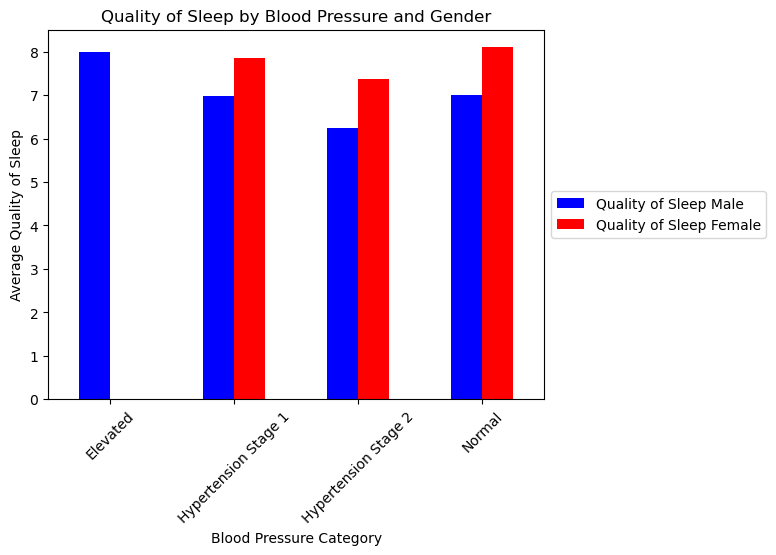

In [31]:
y = 'Quality of Sleep'
bp_groups_df[[f'{y} Male',f'{y} Female']].plot.bar(color=["blue", "red"])
plt.ylabel(f'Average {y}')
plt.title(f"{y} by Blood Pressure and Gender")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation=45)
plt.show()

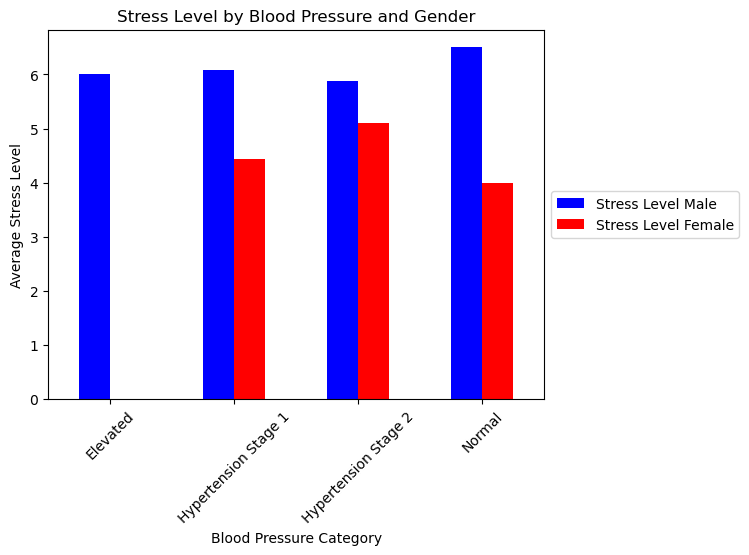

In [32]:
y = 'Stress Level'
bp_groups_df[[f'{y} Male',f'{y} Female']].plot.bar(color=["blue", "red"])
plt.ylabel(f'Average {y}')
plt.title(f"{y} by Blood Pressure and Gender")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation=45)
plt.show()

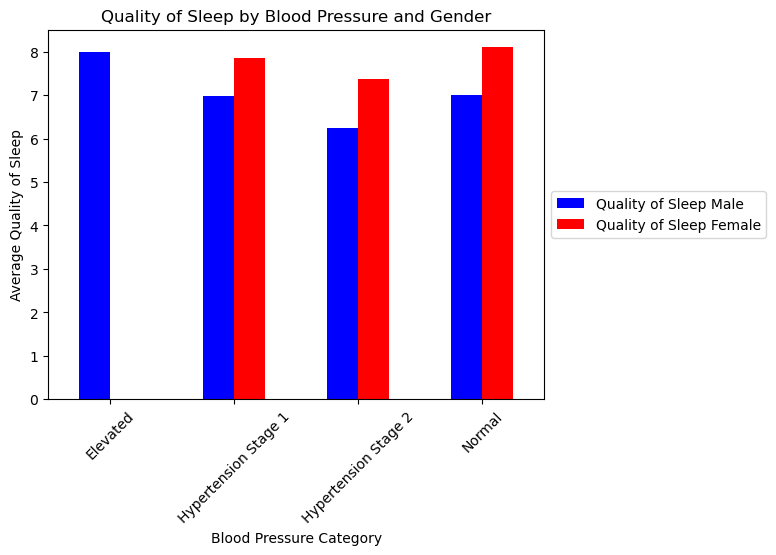

In [33]:
y = 'Quality of Sleep'
bp_groups_df[[f'{y} Male',f'{y} Female']].plot.bar(color=["blue", "red"])
plt.ylabel(f'Average {y}')
plt.title(f"{y} by Blood Pressure and Gender")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation=45)
plt.show()

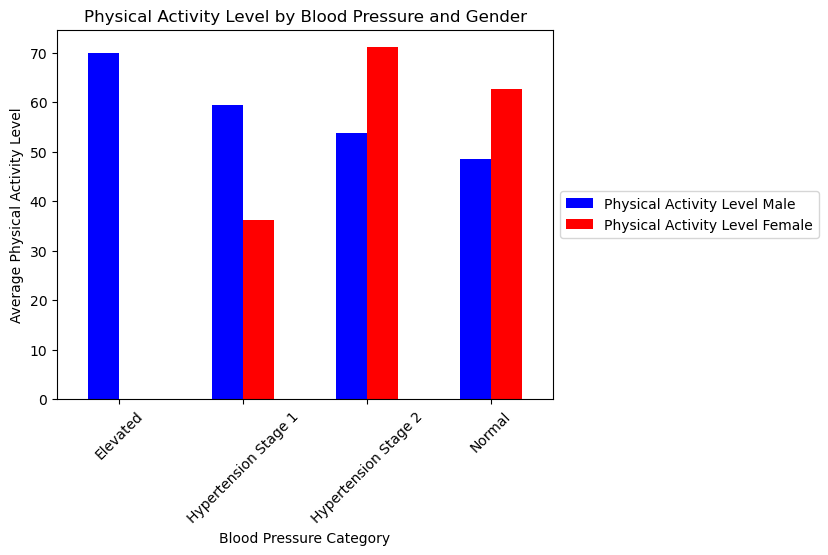

In [34]:
y = 'Physical Activity Level'
bp_groups_df[[f'{y} Male',f'{y} Female']].plot.bar(color=["blue", "red"])
plt.ylabel(f'Average {y}')
plt.title(f"{y} by Blood Pressure and Gender")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation=45)
plt.show()

In [21]:
male_bmi_groups_df = male_df.groupby(['BMI Category'])[numeric_columns].mean().round(2)
female_bmi_groups_df = female_df.groupby(['BMI Category'])[numeric_columns].mean().round(2)

bmi_groups_df = pd.merge(male_bmi_groups_df, female_bmi_groups_df,on='BMI Category',suffixes=[" Male", " Female"])
bmi_groups_df

,Sleep Duration Male,Quality of Sleep Male,Physical Activity Level Male,Stress Level Male,Heart Rate Male,Daily Steps Male,Systolic Male,Diastolic Male,Sleep Duration Female,Quality of Sleep Female,Physical Activity Level Female,Stress Level Female,Heart Rate Female,Daily Steps Female,Systolic Female,Diastolic Female
BMI Category,,,,,,,,,,,,,,,,
Normal,7.20,7.25,63.89,5.92,69.82,7320.61,125.69,82.21,7.79,8.50,45.00,3.50,66.50,6000.00,120.00,77.50
Normal Weight,7.43,7.71,61.00,5.29,69.29,7142.86,119.43,78.71,7.29,7.29,60.00,5.14,72.29,6578.57,122.71,80.64
Obese,6.91,6.33,54.44,5.78,84.33,3355.56,139.67,90.44,7.40,7.00,60.00,5.00,84.00,3300.00,135.00,88.00
Overweight,6.49,6.10,45.29,6.76,72.36,5828.57,129.38,84.64,6.88,7.22,67.56,5.32,70.39,7416.04,137.30,92.38
